In [0]:
! python -m tensorboard.main --logdir=/path/to/logs

2020-05-01 06:28:28.057204: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.2.1 at http://localhost:6006/ (Press CTRL+C to quit)
^C


In [1]:
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

import os
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image

tf.__version__


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0-rc3'

In [2]:
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
#%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np

from packaging import version
import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


In [3]:
! wget "https://ndownloader.figshare.com/files/22336164" -O sphinx_001.tar.gz
! wget "https://ndownloader.figshare.com/files/22344408" -O sphinx_002.tar.gz
! wget "https://ndownloader.figshare.com/files/22366674" -O sphinx_003.tar.gz
! wget "https://ndownloader.figshare.com/files/22367007" -O sphinx_004.tar.gz
! wget "https://ndownloader.figshare.com/files/22388370" -O sphinx_005.tar.gz
! wget "https://ndownloader.figshare.com/files/22388556" -O sphinx_006.tar.gz
! wget "https://ndownloader.figshare.com/files/22399503" -O sphinx_007.tar.gz
! wget "https://ndownloader.figshare.com/files/22399554" -O sphinx_008.tar.gz
! wget "https://ndownloader.figshare.com/files/22414872" -O sphinx_009.tar.gz
! wget "https://ndownloader.figshare.com/files/22467227" -O sphinx_010.tar.gz
! wget "https://ndownloader.figshare.com/files/22477673" -O sphinx_011.tar.gz
! wget "https://ndownloader.figshare.com/files/22477823" -O sphinx_012.tar.gz


--2020-05-02 04:37:42--  https://ndownloader.figshare.com/files/22336164
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 52.212.2.22, 52.49.54.109, 34.241.253.110, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|52.212.2.22|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22336164/sphinx_001.tar.gz [following]
--2020-05-02 04:37:43--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22336164/sphinx_001.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.96.178
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.96.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384473113 (367M) [application/gzip]
Saving to: ‘sphinx_001.tar.gz’

sphinx_001.tar.gz   100%[===================>] 366.66M  29.0MB/s    in 14s     

2020-05-02 04:37:57 (27.1 MB/s) - ‘sphinx_001.tar.gz’ saved [384473113/

In [0]:
!tar -xvf sphinx_001.tar.gz > /dev/null
!tar -xvf sphinx_002.tar.gz > /dev/null
!tar -xvf sphinx_003.tar.gz > /dev/null
!tar -xvf sphinx_004.tar.gz > /dev/null
!tar -xvf sphinx_005.tar.gz > /dev/null
!tar -xvf sphinx_006.tar.gz > /dev/null
!tar -xvf sphinx_007.tar.gz > /dev/null
!tar -xvf sphinx_008.tar.gz > /dev/null
!tar -xvf sphinx_009.tar.gz > /dev/null
!tar -xvf sphinx_010.tar.gz > /dev/null
!tar -xvf sphinx_011.tar.gz > /dev/null
!tar -xvf sphinx_012.tar.gz > /dev/null

In [5]:
! mkdir data
! find sphinx_001 -name '*.*' | xargs mv --target-directory=data
! find sphinx_002 -name '*.*' | xargs mv --target-directory=data
! find sphinx_003 -name '*.*' | xargs mv --target-directory=data
! find sphinx_004 -name '*.*' | xargs mv --target-directory=data
! find sphinx_005 -name '*.*' | xargs mv --target-directory=data
! find sphinx_006 -name '*.*' | xargs mv --target-directory=data
! find sphinx_007 -name '*.*' | xargs mv --target-directory=data
! find sphinx_008 -name '*.*' | xargs mv --target-directory=data
! find sphinx_009 -name '*.*' | xargs mv --target-directory=data
! find sphinx_010 -name '*.*' | xargs mv --target-directory=data
! find sphinx_011 -name '*.*' | xargs mv --target-directory=data
! find sphinx_012 -name '*.*' | xargs mv --target-directory=data

find: ‘sphinx_010’: No such file or directory
mv: missing file operand
Try 'mv --help' for more information.


In [6]:
! du -hs sphinx_001

1012K	sphinx_001


In [7]:
! du -hs data

5.1G	data


In [8]:
png_files = glob.glob('data/*.png')
png_files[0]

'data/CUNW_955350.png'

(40, 150, 3)


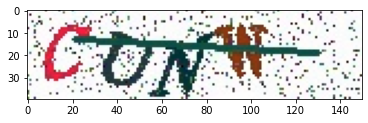

In [9]:
img = cv2.imread(png_files[0],cv2.IMREAD_UNCHANGED)
print(img.shape)
plt.imshow(img)
plt.show()

In [23]:
from tqdm import tqdm
import string
index_ = {}
symbols = string.ascii_uppercase #string.ascii_lowercase +  + '0123456789'
for item in symbols:
  index_[item] = 0

for item in tqdm(png_files):
  d = str(item.split('/')[1]).split('_')[0]
  #print(d)
  #break
  all_c = str(d)
  for i in all_c:
    # if index_[i] == 0:
    #   index_[i] = 0
    # else:
    index_[i] += 1
print(index_)

100%|██████████| 329999/329999 [00:00<00:00, 557318.73it/s]

{'A': 107226, 'B': 105447, 'C': 105399, 'D': 105347, 'E': 105183, 'F': 75196, 'G': 90018, 'H': 51732, 'I': 0, 'J': 0, 'K': 51718, 'L': 0, 'M': 51848, 'N': 51821, 'O': 0, 'P': 53546, 'Q': 0, 'R': 54596, 'S': 0, 'T': 53281, 'U': 51491, 'V': 51607, 'W': 51437, 'X': 51544, 'Y': 51559, 'Z': 0}


In [41]:
index = {}
rev_index = {}
count = 1
for item in index_:
  #print(item)
  #if index[item]>0
  index[item] = count
  rev_index[count] = item
  count += 1 
print(index)
print(rev_index)

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
{1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J', 11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T', 21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z'}


In [0]:
plot_ = []
for item in index_:
    plot_.append(index_[item])

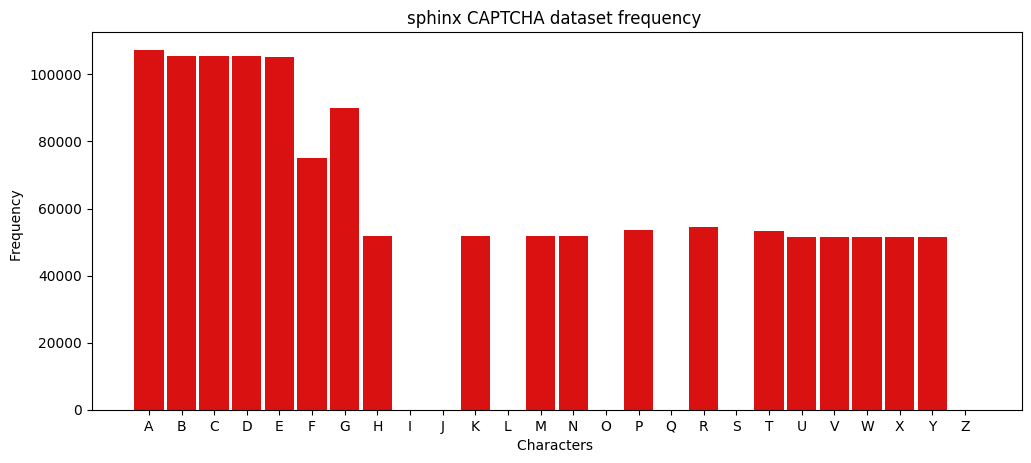

In [31]:
#index
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 5), dpi=100, facecolor='w', edgecolor='k')
plt.bar(index_.keys(), index_.values(), width=0.9, color='#d91111')
plt.title('sphinx CAPTCHA dataset frequency ')
plt.xlabel("Characters ", fontsize=10)  
plt.ylabel("Frequency  ", fontsize=10)
#plt.xticks(fontsize=14)  
#plt.yticks(fontsize=14)
plt.show()

In [0]:
DATA_DIR = 'data'  # 302410 images. validate accuracy: 98.8%
H, W, C = 40, 150, 3
N_LABELS = 26
D = 4

In [0]:
def parse_filepath(filepath):
    try:
        path, filename = os.path.split(filepath)
        filename, ext = os.path.splitext(filename)
        label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [52]:
# create a pandas data frame of images, age, gender and race
files = glob.glob(os.path.join(DATA_DIR, "*.png"))
attributes = list(map(parse_filepath, files))

df = pd.DataFrame(attributes)
df['file'] = files
df.columns = ['label', 'file']
df = df.dropna()
df.head()

,label,file
0,CUNW,data/CUNW_955350.png
1,BXTY,data/BXTY_759101.png
2,DVAX,data/DVAX_284254.png
3,DTWU,data/DTWU_615000.png
4,BACD,data/BACD_132224.png


In [53]:
p = np.random.permutation(len(df))
train_up_to = int(len(df) * 0.95)
train_idx = p[:train_up_to]
test_idx = p[train_up_to:]

# split train_idx further into training and validation set
train_up_to = int(train_up_to * 0.95)
train_idx, valid_idx = train_idx[:train_up_to], train_idx[train_up_to:]

print('train count: %s, valid count: %s, test count: %s' % (
    len(train_idx), len(valid_idx), len(test_idx)))

train count: 297824, valid count: 15675, test count: 16500


In [0]:
from tensorflow.keras.utils import to_categorical
from PIL import Image



def get_data_generator(df, indices, for_training, batch_size=16):
    images, labels = [], []
    while True:
        for i in indices:
            r = df.iloc[i]
            file, label = r['file'], r['label']
            im = Image.open(file)
            im = im.resize((H, W))
            im = np.array(im) / 255.0
            images.append(np.array(im))
            labels.append(np.array([np.array(to_categorical(index[i], N_LABELS)) for i in label]))
            if len(images) >= batch_size:
#                 print(np.array(images), np.array(labels))
                yield np.array(images), np.array(labels)
                images, labels = [], []
        if not for_training:
            break

In [55]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalMaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

input_layer = tf.keras.Input(shape=(H, W, C))
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(input_layer)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
#x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(D * N_LABELS, activation='softmax')(x)
x = tf.keras.layers.Reshape((D, N_LABELS))(x)

model = tf.keras.models.Model(inputs=input_layer, outputs=x)

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics= ['accuracy'])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 40, 150, 3)]      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 38, 148, 32)       896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 17, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 36, 64)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 34, 64)         36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 17, 64)         0   

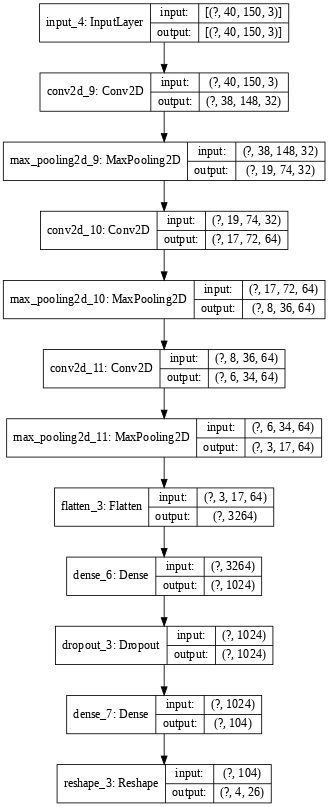

In [56]:
from tensorflow.keras.utils import  plot_model as pm  #plotting the model structure
pm(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

# batch_size = 100
# valid_batch_size = 32
batch_size = 1024
valid_batch_size = 512
train_gen = get_data_generator(df, train_idx, for_training=True, batch_size=batch_size)
valid_gen = get_data_generator(df, valid_idx, for_training=True, batch_size=valid_batch_size)

callbacks = [
    ModelCheckpoint("./model_checkpoint", monitor='val_loss')
]
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_gen,
                    steps_per_epoch=len(train_idx)//batch_size,
                    epochs=15,
                     callbacks=[tensorboard_callback,callbacks],
                    validation_data=valid_gen,
                    validation_steps=len(valid_idx)//valid_batch_size)

Epoch 1/15
 36/290 [==>...........................] - ETA: 37:25 - loss: 2.1507 - accuracy: 0.3111